# Accenture Content Data Analysis

## Import necessary libraries and datasets

In [53]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the datasets
content_data = pd.read_csv("Content.csv")
reaction_data = pd.read_csv("Reactions.csv")
reactionType_data = pd.read_csv("ReactionTypes.csv")

## Data cleaning

### 1- Content dataset

In [4]:
# Dataset dimensions
content_data.shape

(1000, 6)

In [5]:
# Preview the dataset
content_data.head(10)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
6,6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs,https://socialbuzz.cdn.com/content/storage/3f8...
7,7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology,https://socialbuzz.cdn.com/content/storage/e54...
8,8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...
9,9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...


In [6]:
# More details about the dataset
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [7]:
# Identify missing values
content_data.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

There are only missing values in the "URL" column. Since that variable is not relevant for our analysis, we'll drop it along with the "Unnamed" variable 

In [8]:
# Drop non-relevant columns
content_data = content_data.drop(columns= ["Unnamed: 0","URL", "User ID"])

In [9]:
# Identify duplicates
content_data.duplicated().sum()

0

There is no duplicate rows in the dataset

In [10]:
# Rename columns
content_data.rename(columns={'Type': 'Content Type'}, inplace= True)

In [11]:
# Inspect the unique values of "Content Type"
content_data['Content Type'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [12]:
# Standardize the typos
content_data['Content Type'] = content_data['Content Type'].str.title()

In [13]:
# Inspect the unique values of "Category"
content_data['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

The unique values are not uniforms: 'culture' and '"animals"'

In [14]:
# Standardize the typos
content_data['Category'] = content_data['Category'].replace('"','', regex=True)
content_data['Category'] = content_data['Category'].str.title()

In [15]:
# Let's check it
content_data['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

Job done here

### 2- Reaction dataset

In [16]:
# Dataset dimensions
reaction_data.shape

(25553, 5)

In [17]:
# Preview the dataset
reaction_data.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [18]:
# More details about the dataset
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [19]:
# Identify missing values
reaction_data.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [20]:
# Drop missing values
reaction_data = reaction_data.dropna()

In [21]:
# Drop irrelevant columns
reaction_data = reaction_data.drop(columns= ['Unnamed: 0', 'User ID'])

In [22]:
# Convert Dates type
reaction_data['Datetime'] = pd.to_datetime(reaction_data['Datetime'])

In [23]:
# Rename column
reaction_data.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [24]:
# Inspect unique values
reaction_data['Reaction Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'indifferent', 'super love', 'worried', 'like', 'heart',
       'want', 'intrigued', 'love', 'adore'], dtype=object)

In [25]:
# Standardize unique values
reaction_data['Reaction Type'] = reaction_data['Reaction Type'].str.title()

In [26]:
# Data integrity tests
print("Number of missing values:", reaction_data.isna().sum())

Number of missing values: Content ID       0
Reaction Type    0
Datetime         0
dtype: int64


In [27]:
print("Number of duplicates:", reaction_data.duplicated().sum())

Number of duplicates: 0


In [28]:
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 704.2+ KB


### 3- ReactionType dataset

In [29]:
# Dataset dimensions
reactionType_data.shape

(16, 4)

In [30]:
# Preview dataset
reactionType_data.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [31]:
# More details
reactionType_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [32]:
# Drop irrelevant column
reactionType_data = reactionType_data.drop(columns= "Unnamed: 0")

In [33]:
# Rename column
reactionType_data.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [34]:
# Inspect unique values
reactionType_data['Reaction Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [35]:
reactionType_data['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [36]:
# Standardize typos
reactionType_data['Reaction Type'] = reactionType_data['Reaction Type'].str.title()
reactionType_data['Sentiment'] = reactionType_data['Sentiment'].str.title()

In [37]:
# Data integrity tests
print("Number of missing values:", reactionType_data.isna().sum())

Number of missing values: Reaction Type    0
Sentiment        0
Score            0
dtype: int64


In [38]:
print("Number of duplicates:", reactionType_data.duplicated().sum())

Number of duplicates: 0


In [39]:
reactionType_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


Data cleaned

### Merge the datasets

In [40]:
# Merge Reactions with Reaction Types to get 'Sentiment' and 'Score'
reaction_data = pd.merge(reaction_data, reactionType_data, on='Reaction Type', how='left')

# Merge Reactions with Content to get 'Content Type' and 'Category'
reaction_data = pd.merge(reaction_data, content_data, on='Content ID', how='left')

# Display the updated DataFrame
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 0 to 22533
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
 3   Sentiment      22534 non-null  object        
 4   Score          22534 non-null  int64         
 5   Content Type   22534 non-null  object        
 6   Category       22534 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.4+ MB


In [41]:
# Display the updated DataFrame
reaction_data.head()

,Content ID,Reaction Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2020-11-07 09:43:50,Negative,0,Photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Dislike,2021-06-17 12:22:51,Negative,10,Photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Scared,2021-04-18 05:13:58,Negative,15,Photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-01-06 19:13:01,Negative,0,Photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Interested,2020-08-23 12:25:58,Positive,30,Photo,Studying


In [42]:
# Save clean data
reaction_data.to_csv('./clean_data.csv')

## Engagement Analysis

### Which content types drive the highest engagement (measured by the number of reactions)?

In [43]:
reaction_data["Content Type"].value_counts()

Photo    6043
Video    5728
Gif      5578
Audio    5185
Name: Content Type, dtype: int64

### Are there particular categories that users react to more frequently or positively?

In [50]:
# Count total reactions per category
reaction_counts = reaction_data.groupby('Category').size().reset_index(name='Total Reactions')


In [49]:
# Count positive reactions per category
positive_reactions = reaction_data[reaction_data['Sentiment'] == 'Positive'].groupby('Category').size().reset_index(name='Positive Reactions')

# Merge with total reactions
reaction_analysis = pd.merge(reaction_counts, positive_reactions, on='Category', how='left')
reaction_analysis['Positive Rate'] = (reaction_analysis['Positive Reactions'] / reaction_analysis['Total Reactions']) * 100
print(reaction_analysis)


           Category  Total Reactions  Positive Reactions  Positive Rate
0           Animals             1738                 962      55.350978
1           Cooking             1525                 851      55.803279
2           Culture             1538                 855      55.591678
3              Dogs             1227                 689      56.153219
4         Education             1311                 751      57.284516
5           Fitness             1284                 721      56.152648
6              Food             1556                 872      56.041131
7    Healthy Eating             1572                 896      56.997455
8   Public Speaking             1116                 661      59.229391
9           Science             1646                 934      56.743621
10           Soccer             1339                 752      56.161314
11         Studying             1251                 697      55.715428
12       Technology             1557                 896      57

In [51]:
# Sort by Total Reactions
top_categories_by_frequency = reaction_analysis.sort_values(by='Total Reactions', ascending=False)

# Sort by Positive Rate
top_categories_by_positivity = reaction_analysis.sort_values(by='Positive Rate', ascending=False)

print("Categories with the most reactions:\n", top_categories_by_frequency.head())
print("Categories with the highest positivity rate:\n", top_categories_by_positivity.head())


Categories with the most reactions:
           Category  Total Reactions  Positive Reactions  Positive Rate
0          Animals             1738                 962      55.350978
9          Science             1646                 934      56.743621
7   Healthy Eating             1572                 896      56.997455
12      Technology             1557                 896      57.546564
6             Food             1556                 872      56.041131
Categories with the highest positivity rate:
            Category  Total Reactions  Positive Reactions  Positive Rate
8   Public Speaking             1116                 661      59.229391
12       Technology             1557                 896      57.546564
4         Education             1311                 751      57.284516
7    Healthy Eating             1572                 896      56.997455
9           Science             1646                 934      56.743621


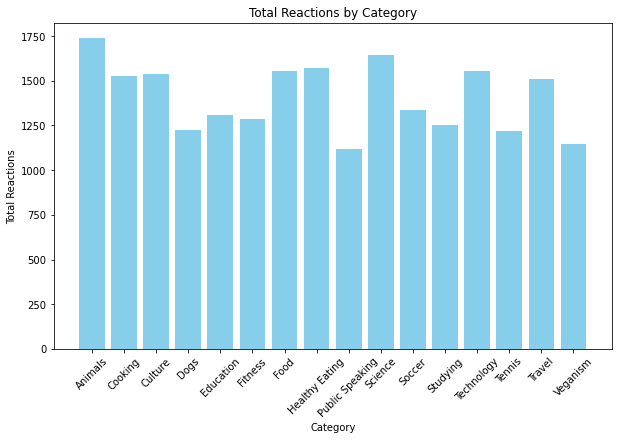

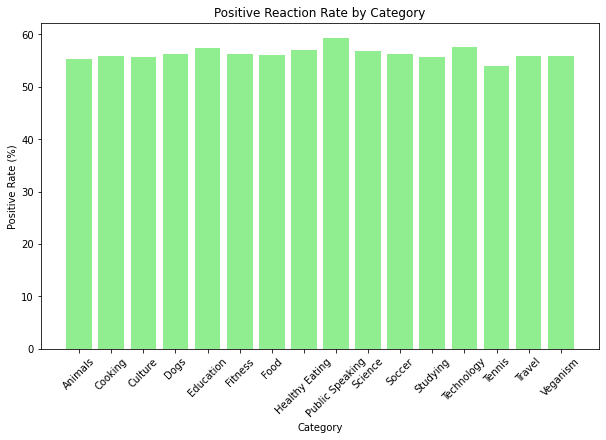

In [ ]:
# Bar plot for total reactions
plt.figure(figsize=(10, 6))
plt.bar(reaction_analysis['Category'], reaction_analysis['Total Reactions'], color='skyblue')
plt.title('Total Reactions by Category')
plt.xlabel('Category')
plt.ylabel('Total Reactions')
plt.xticks(rotation=45)
plt.show()

# Bar plot for positive rate
plt.figure(figsize=(10, 6))
plt.bar(reaction_analysis['Category'], reaction_analysis['Positive Rate'], color='lightgreen')
plt.title('Positive Reaction Rate by Category')
plt.xlabel('Category')
plt.ylabel('Positive Rate (%)')
plt.xticks(rotation=45)
plt.show()

- The category 'Animals' has the highest number of reactions, followed by 'Science' and 'Healthy Eating'.

- The category 'Public Speaking' has the highest positivity rate at 59%, suggesting users strongly associate positive sentiment with this content."

### What is the distribution of reaction types across different categories?

In [81]:
# Group by Category and Reaction Type, then count occurrences
reaction_distribution = reaction_data.groupby(['Category', 'Reaction Type']).size().reset_index(name= 'Count')

# Pivot the table for better viz
reaction_pivot = reaction_distribution.pivot(index='Category', columns='Reaction Type', values='Count').fillna(0)

print(reaction_pivot)

Reaction Type    Adore  Cherish  Disgust  Dislike  Hate  Heart  Indifferent  \
Category                                                                      
Animals            104      116      108      105   118    114           91   
Cooking             99       80      100      100   100    101           77   
Culture             86      102       92      101    90     83          105   
Dogs                76       64       77       74    83     92           83   
Education           80       78       62       85    87     83           82   
Fitness             91       69       93       90    63     75           74   
Food                82      108       97       93   117    102           88   
Healthy Eating     108       95       98       90   109    103           99   
Public Speaking     76       61       62       74    54     80           69   
Science            110       98      103      102    90    105          117   
Soccer              83       76       83       74   

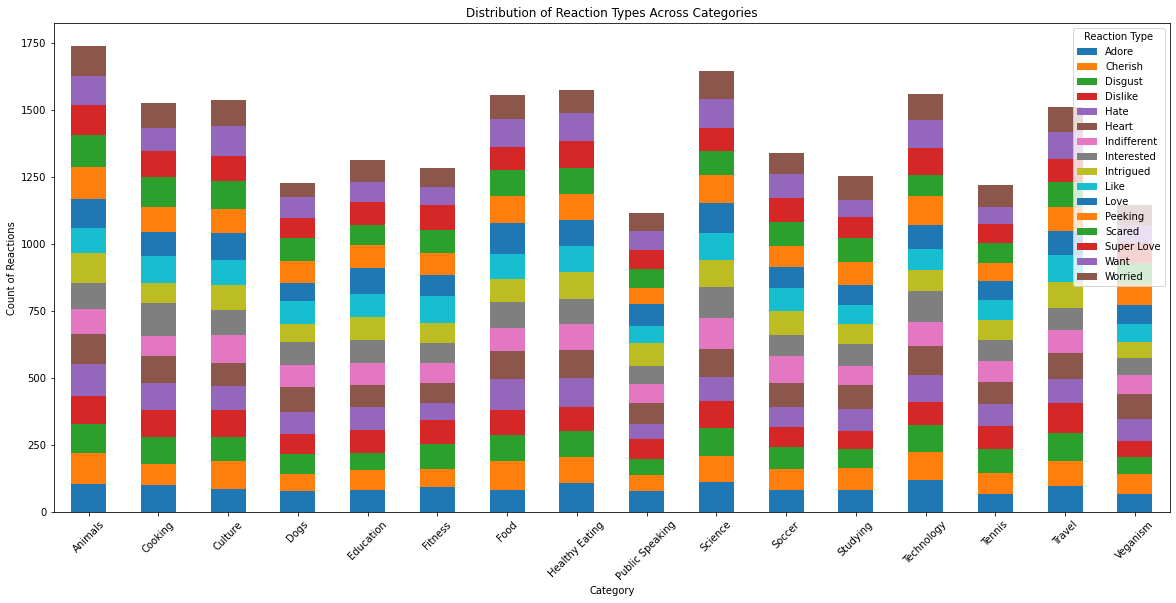

In [80]:
# Create a stacked bar chart
reaction_pivot.plot(kind='bar', stacked=True, figsize=(20,9))
plt.title('Distribution of Reaction Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Count of Reactions')
plt.legend(title='Reaction Type', loc="upper right")
plt.xticks(rotation=45)
plt.show()

- In the Food category, the most common reaction type is Love, followed by Peeking.

- The Travel category has a higher proportion of Dislikes compared to other categories.


## Sentiment Analysis

### Which content generates the most positive sentiment? The most negative sentiment?

In [88]:
# Group by Content ID and Sentiment, then count
sentiment_counts = reaction_data.groupby(['Content ID', 'Sentiment']).size().reset_index(name='Count')

# Pivot table to separate Positive and Negative counts
sentiment_pivot = sentiment_counts.pivot(index='Content ID', columns='Sentiment', values='Count').fillna(0)

# Add total reactions per content for context 
#sentiment_pivot['Total Reactions'] = sentiment_pivot.sum(axis=1)

print(sentiment_pivot)


Sentiment                             Negative  Neutral  Positive
Content ID                                                       
004e820e-49c3-4ba2-9d02-62db0065410c       0.0      0.0       1.0
00d0cdf9-5919-4102-bf84-ebde253c3cd2      13.0      4.0      25.0
01396602-c759-4a17-90f0-8f9b3ca11b30      15.0      3.0      18.0
019b61f4-926c-438e-adaf-6119c5eab752       4.0      2.0       6.0
01ab84dd-6364-4236-abbb-3f237db77180       1.0      0.0       0.0
...                                        ...      ...       ...
fdca8d15-966b-4825-8133-1fafc5c1f9fc       8.0      2.0      15.0
fe06b730-b1f8-4f55-af1a-52487d8f1ec6       8.0      3.0      12.0
fea8d77c-fd0b-4678-868f-fbae567642f3       1.0      1.0       4.0
fea9077f-2fe7-43bd-aaef-dc2619988d94       1.0      3.0       2.0
ff883828-a610-492d-8635-8a777eaad25f      15.0      8.0      21.0

[962 rows x 3 columns]


In [89]:
# Sort by positive sentiment
most_positive_content = sentiment_pivot.sort_values(by='Positive', ascending=False).head(1)
print("Content with the most positive sentiment:\n", most_positive_content)


Content with the most positive sentiment:
 Sentiment                             Negative  Neutral  Positive
Content ID                                                       
cd568dd1-70cf-45d6-b495-10eebff8c920       8.0      4.0      32.0


In [90]:
# Sort by negative sentiment
most_negative_content = sentiment_pivot.sort_values(by='Negative', ascending=False).head(1)
print("Content with the most negative sentiment:\n", most_negative_content)


Content with the most negative sentiment:
 Sentiment                             Negative  Neutral  Positive
Content ID                                                       
d90a34f1-60ed-4a79-b7bf-fd22efa12e4c      23.0      3.0      18.0


In [91]:
# Calculate proportions
#sentiment_pivot['Positive Rate'] = (sentiment_pivot['Positive'] / sentiment_pivot['Total Reactions']) * 100
#sentiment_pivot['Negative Rate'] = (sentiment_pivot['Negative'] / sentiment_pivot['Total Reactions']) * 100

# Find content with highest Positive and Negative Rates
#most_positive_rate_content = sentiment_pivot.sort_values(by='Positive Rate', ascending=False).head(1)
#most_negative_rate_content = sentiment_pivot.sort_values(by='Negative Rate', ascending=False).head(1)

#print("Content with the highest positive rate:\n", most_positive_rate_content)
#print("Content with the highest negative rate:\n", most_negative_rate_content)


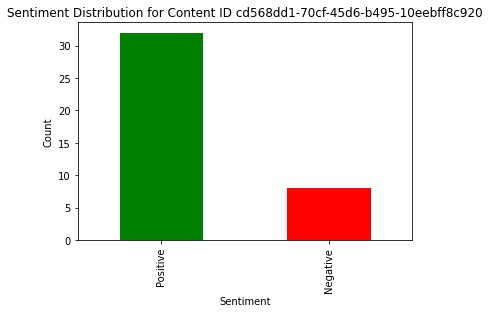

In [92]:
# Bar chart for a specific content
top_content_id = most_positive_content.index[0]
top_content_data = sentiment_pivot.loc[top_content_id]

top_content_data[['Positive', 'Negative']].plot(kind='bar', color=['green', 'red'])
plt.title(f'Sentiment Distribution for Content ID {top_content_id}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
